![](../Assets/itd.png)
    
# Inteligencia Artificial 

## Proyecto Final Arboles de Decisión

## Profesor:
### M.C José Gabriel Rodriguez Rivas    


## Integrantes:
### Julio Rubio Covarrubias
### José Ángel Zamora Guerrero
### Angel Omar Ceniceros Berumen
    
    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training = pd.read_csv('./Data/Covid/200809COVID19MEXICO.csv',encoding="ISO-8859-1")

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1091695 non-null  object
 1   ID_REGISTRO          1091695 non-null  object
 2   ORIGEN               1091695 non-null  int64 
 3   SECTOR               1091695 non-null  int64 
 4   ENTIDAD_UM           1091695 non-null  int64 
 5   SEXO                 1091695 non-null  int64 
 6   ENTIDAD_NAC          1091695 non-null  int64 
 7   ENTIDAD_RES          1091695 non-null  int64 
 8   MUNICIPIO_RES        1091695 non-null  int64 
 9   TIPO_PACIENTE        1091695 non-null  int64 
 10  FECHA_INGRESO        1091695 non-null  object
 11  FECHA_SINTOMAS       1091695 non-null  object
 12  FECHA_DEF            1091695 non-null  object
 13  INTUBADO             1091695 non-null  int64 
 14  NEUMONIA             1091695 non-null  int64 
 15  EDAD           

In [4]:
training.drop(columns=['FECHA_ACTUALIZACION','MUNICIPIO_RES','ENTIDAD_NAC','PAIS_NACIONALIDAD'],inplace=True)

In [5]:
training['Vive']= training['FECHA_DEF'].apply(lambda current: 1 if current == '9999-99-99' else 0)
training.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI,Vive
0,11c49c,2,3,2,1,2,1,2020-05-18,2020-05-15,9999-99-99,...,2,2,2,2,1,1,99,99,97,1
1,144935,2,3,2,2,2,1,2020-05-26,2020-05-22,9999-99-99,...,2,2,2,2,1,1,99,99,97,1
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,99,1,99,99,2,1
3,010133,2,4,26,1,26,1,2020-03-23,2020-03-12,9999-99-99,...,2,2,2,2,99,1,99,99,97,1
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,1,2,2,1,1,99,99,2,0


In [6]:
vivos = 0
muertos = 0
for sobrevive in training['Vive']:
    if sobrevive == 1:
        vivos = vivos+1
    else:
        muertos = muertos+1
print('Vivoos {}'.format(vivos))
print('Muertos {}'.format(muertos))

Vivoos 1024530
Muertos 67165


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091695 entries, 0 to 1091694
Data columns (total 32 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ID_REGISTRO         1091695 non-null  object
 1   ORIGEN              1091695 non-null  int64 
 2   SECTOR              1091695 non-null  int64 
 3   ENTIDAD_UM          1091695 non-null  int64 
 4   SEXO                1091695 non-null  int64 
 5   ENTIDAD_RES         1091695 non-null  int64 
 6   TIPO_PACIENTE       1091695 non-null  int64 
 7   FECHA_INGRESO       1091695 non-null  object
 8   FECHA_SINTOMAS      1091695 non-null  object
 9   FECHA_DEF           1091695 non-null  object
 10  INTUBADO            1091695 non-null  int64 
 11  NEUMONIA            1091695 non-null  int64 
 12  EDAD                1091695 non-null  int64 
 13  NACIONALIDAD        1091695 non-null  int64 
 14  EMBARAZO            1091695 non-null  int64 
 15  HABLA_LENGUA_INDIG  1091695 non-

In [8]:
muertesPorCovid = 0
for sobrevive, resultado in zip(training.Vive,training.RESULTADO):
    if sobrevive == 0:
        if resultado == 1:
            muertesPorCovid+=1
muertesPorCovid

52298

In [9]:
def isDeadByCovid(persona):
    vive = persona['Vive']
    resultado = persona['RESULTADO']
    if vive == 0:
        if resultado == 1:
            return 1
        else:
            return 0
    else:
        return 0


In [10]:
training['MuerteCovid'] = training.apply(isDeadByCovid,axis=1)

In [11]:
m = 0
for x in training['MuerteCovid']:
    if x == 1:
        m+=1
m

52298

In [12]:
training = training[(training['INTUBADO']==1) | (training['INTUBADO']==2)]
training.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI,Vive,MuerteCovid
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,99,1,99,99,2,1,0
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,1,2,2,1,1,99,99,2,0,1
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,99,1,99,99,2,0,1
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,1,99,1,99,99,2,0,1
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,1,2,1,2,1,99,99,2,1,0


In [13]:
training = training[training['RESULTADO']==1 ]
training.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI,Vive,MuerteCovid
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,99,1,99,99,2,1,0
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,1,2,2,1,1,99,99,2,0,1
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,99,1,99,99,2,0,1
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,1,99,1,99,99,2,0,1
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,1,2,1,2,1,99,99,2,1,0


In [14]:
len(training)

127696

## Entrenando al Modelo
### Primero queremos ver si lo van a entubar

In [15]:
#code cell 8
#create the array for the target values
y_target = training["INTUBADO"].values

In [16]:
#code cell 9
columns = [
        "SEXO","NEUMONIA","EDAD",
        "EMBARAZO","DIABETES",
        "EPOC","ASMA","INMUSUPR",
        "HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
        "OBESIDAD","RENAL_CRONICA","TABAQUISMO",
        "UCI"
    
    ]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [17]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=8)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)
clf_train2 = clf_train.fit(X_input, y_target)

In [18]:
#code cell 11
clf_train.score(X_input,y_target)

0.9125971056258614

In [19]:
clf_train2.score(X_input,y_target)

0.9125971056258614

In [20]:
clasificacion = ['SE INTUBA','NO SE INTUBA']

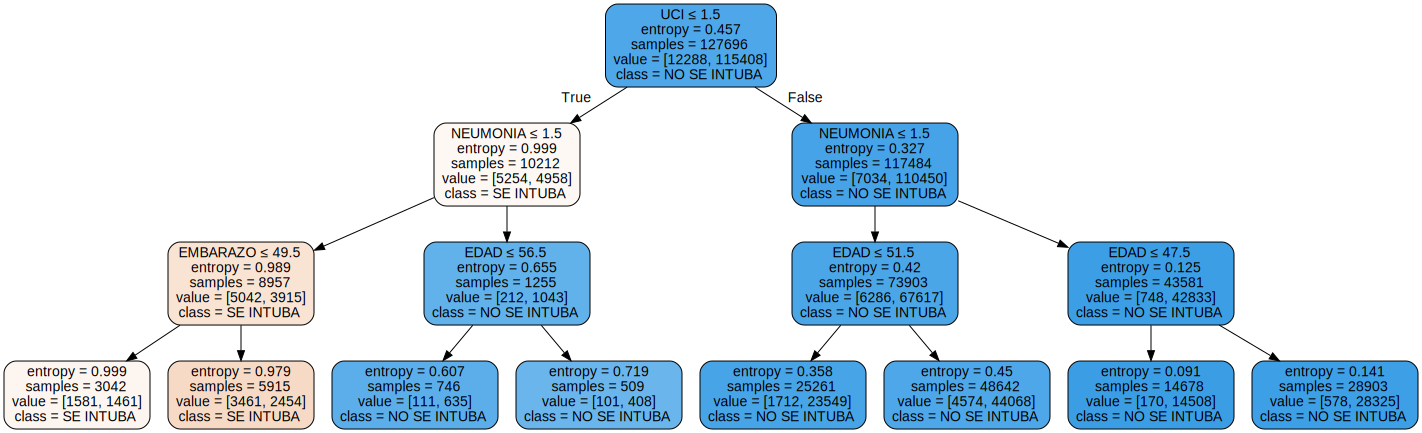

In [21]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('COVID0',format='png')
graph

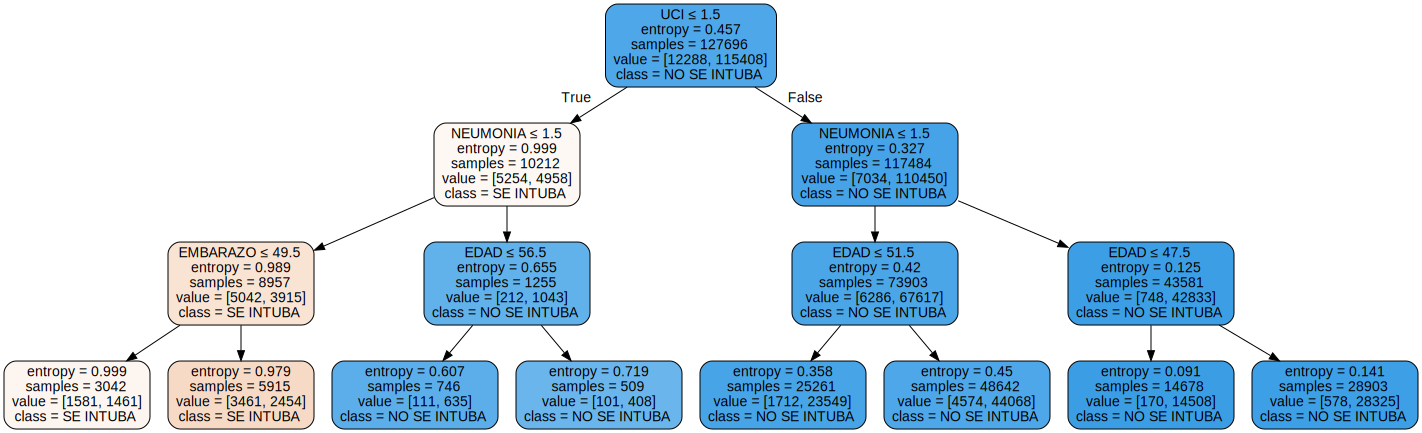

In [22]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train2,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('COVID',format='png')
graph

## Parte 2: Aplicar el modelo del árbol de decisiones


In [23]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")

In [24]:
testing.drop(columns=['FECHA_ACTUALIZACION','MUNICIPIO_RES','ENTIDAD_NAC','PAIS_NACIONALIDAD'],inplace=True)

In [25]:
testing = testing[(testing['INTUBADO']==1) | (testing['INTUBADO']==2)]
testing.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,2,99,1,99,99,2
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,2,1,2,2,1,1,99,99,2
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,2,2,99,1,99,99,2
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,2,2,1,99,1,99,99,2
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,2,2,1,2,1,2,1,99,99,2


In [26]:
testing = testing[testing['RESULTADO']==1 ]
testing.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,2,99,1,99,99,2
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,2,1,2,2,1,1,99,99,2
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,2,2,99,1,99,99,2
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,2,2,1,99,1,99,99,2
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,2,2,1,2,1,2,1,99,99,2


In [27]:
X_input = testing[list(columns)].values

## HAcer predicciones con el metodo predict del clasificador

In [28]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Intubado':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head()

,Est_Intubado,ID_REGISTRO
2,2,1bf200
4,2,1a1635
5,2,177924
6,2,087e3c
7,2,022cb3


In [29]:
num_Entubados = target_labels[target_labels['Est_Intubado']==1]
num_Entubados

,Est_Intubado,ID_REGISTRO
199,1,077c96
243,1,062a08
281,1,0f822b
332,1,13b414
559,1,0cc8e1
...,...,...
830280,1,0a0971
830281,1,1bb860
830426,1,0cc00a
830531,1,0be892


In [30]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','INTUBADO']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Intubado'] == testing_results['INTUBADO']) / float(len(testing_results))
# Print the result
acc

0.9125971056258614

## Evaluar el modelo del árbol de decisiones

In [31]:
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1", usecols=["SEXO","NEUMONIA","EDAD",
    "EMBARAZO","DIABETES",
    "EPOC","ASMA","INMUSUPR",
    "HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
    "OBESIDAD","RENAL_CRONICA","TABAQUISMO",
    "UCI","RESULTADO","INTUBADO"])
#View info for the new dataframe
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,1,97,2,63,2,2,2,2,2,1,2,2,2,2,2,1,97
1,2,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
3,1,97,1,27,2,2,2,2,2,2,2,2,2,2,2,1,97
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2


In [32]:
all_data = all_data[(all_data['INTUBADO']==1) | (all_data['INTUBADO']==2)]
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2
5,2,2,1,51,97,2,2,2,2,2,2,2,2,2,2,1,2
6,2,2,1,52,97,1,2,2,2,2,2,2,2,2,1,1,2
7,1,2,1,64,2,2,2,2,2,1,2,2,1,2,1,1,2


In [33]:
all_data = all_data[all_data['RESULTADO']==1 ]
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2
5,2,2,1,51,97,2,2,2,2,2,2,2,2,2,2,1,2
6,2,2,1,52,97,1,2,2,2,2,2,2,2,2,1,1,2
7,1,2,1,64,2,2,2,2,2,1,2,2,1,2,1,1,2


In [34]:
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["INTUBADO"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [35]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [36]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.9130219141965882 Testing score = 0.9124493431742986


# OTROS CRITERIOS PARA LA EVALUACION
## Sin 
## "UCI"


In [37]:
training

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI,Vive,MuerteCovid
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,99,1,99,99,2,1,0
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,1,2,2,1,1,99,99,2,0,1
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,99,1,99,99,2,0,1
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,1,99,1,99,99,2,0,1
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,1,2,1,2,1,99,99,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830633,0b17b3,1,4,1,2,1,2,2020-07-30,2020-07-24,9999-99-99,...,1,2,2,99,1,99,99,2,1,0
830634,089cf6,2,12,14,2,14,2,2020-07-29,2020-07-24,9999-99-99,...,1,2,2,2,1,99,99,2,1,0
830635,19fc4b,1,4,19,2,19,2,2020-07-31,2020-07-29,9999-99-99,...,2,2,2,99,1,99,99,2,1,0
830636,0f9998,1,4,8,2,8,2,2020-07-30,2020-07-27,2020-08-03,...,2,2,2,99,1,99,99,2,0,1


In [38]:
#code cell 8
#create the array for the target values
y_target = training["INTUBADO"].values

In [39]:
#code cell 9
columns = ["DIABETES",
    "SEXO","EDAD","NEUMONIA","INMUSUPR",
    "EMBARAZO",
    "EPOC","ASMA","HIPERTENSION","OTRA_COM",
    "OBESIDAD","RENAL_CRONICA","TABAQUISMO","CARDIOVASCULAR"
    

]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [40]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)
clf_train2 = clf_train.fit(X_input, y_target)

In [41]:
#code cell 11
clf_train.score(X_input,y_target)

0.9037714572108758

In [42]:
clf_train2.score(X_input,y_target)

0.9037714572108758

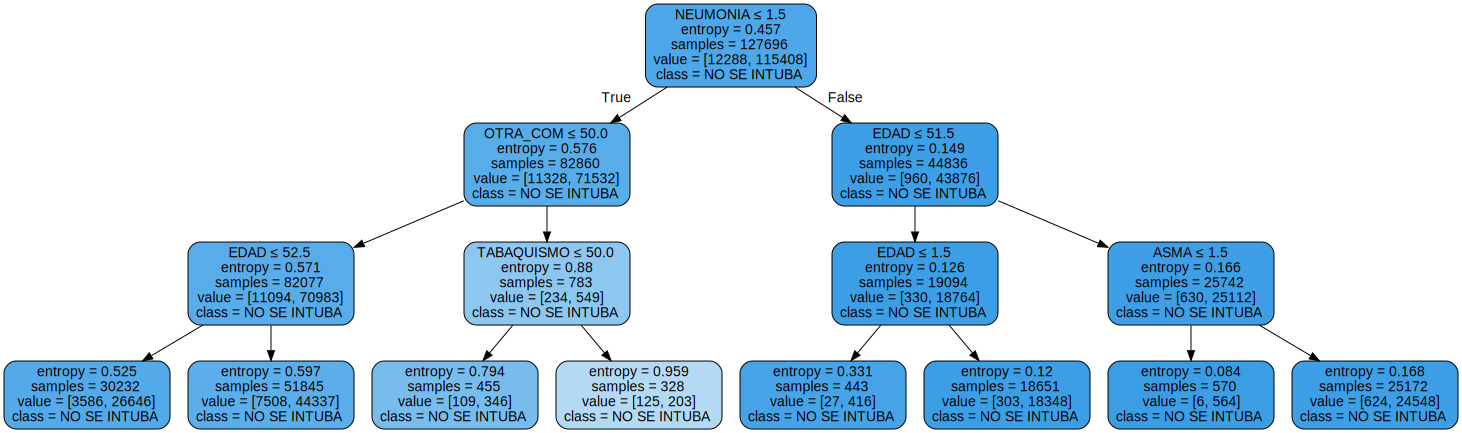

In [43]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('b',format='png')
graph

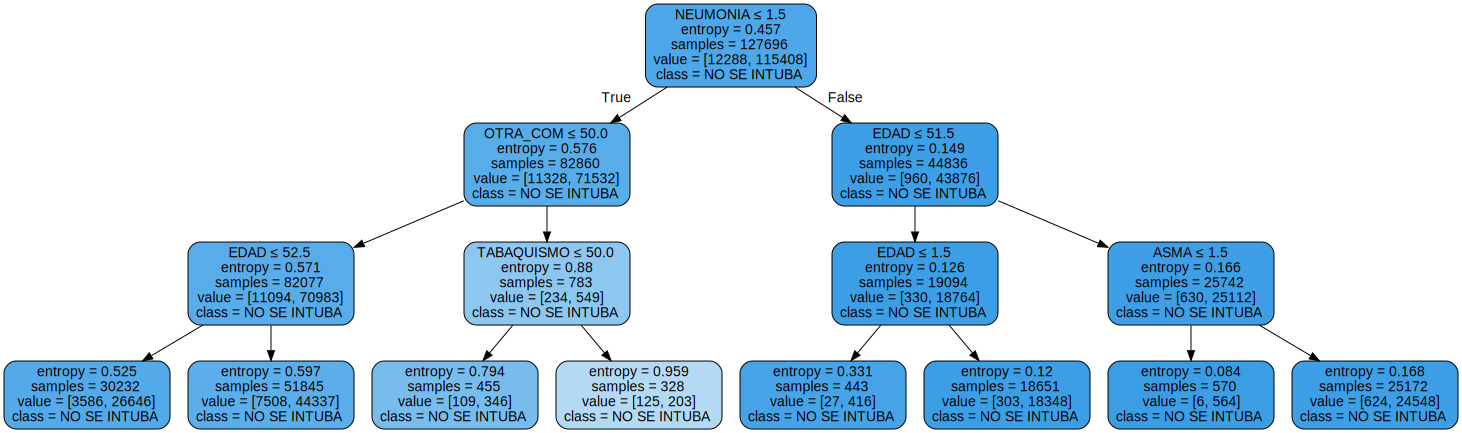

In [44]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train2,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('2COVID0',format='png')
graph

In [45]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")
testing.drop(columns=['FECHA_ACTUALIZACION','MUNICIPIO_RES','ENTIDAD_NAC','PAIS_NACIONALIDAD'],inplace=True)
testing = testing[(testing['INTUBADO']==1) | (testing['INTUBADO']==2)]
testing.head()
testing = testing[testing['RESULTADO']==1 ]
testing.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_ORIGEN,UCI
2,1bf200,2,4,9,1,9,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,2,99,1,99,99,2
4,1a1635,2,3,15,2,15,2,2020-05-24,2020-05-20,2020-06-12,...,2,2,1,2,2,1,1,99,99,2
5,177924,2,4,2,2,2,2,2020-04-18,2020-04-14,2020-05-03,...,2,2,2,2,2,99,1,99,99,2
6,087e3c,2,4,9,2,9,2,2020-05-09,2020-04-29,2020-05-14,...,2,2,2,2,1,99,1,99,99,2
7,022cb3,2,3,2,1,2,2,2020-04-01,2020-03-28,9999-99-99,...,2,2,1,2,1,2,1,99,99,2


In [46]:
X_input = testing[list(columns)].values

In [47]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Intubado':target_labels, 'ID_REGISTRO':testing['ID_REGISTRO']})

#display the first few rows of the data set
target_labels.head()

,Est_Intubado,ID_REGISTRO
2,2,1bf200
4,2,1a1635
5,2,177924
6,2,087e3c
7,2,022cb3


In [48]:
num_Entubados = target_labels[target_labels['Est_Intubado']==1]
len(num_Entubados)

0

In [49]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['ID_REGISTRO','INTUBADO']], on=['ID_REGISTRO'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Intubado'] == testing_results['INTUBADO']) / float(len(testing_results))
# Print the result
acc## Evaluar el modelo del árbol de decisiones

0.9037714572108758

## Evaluar el modelo del árbol de decisiones

In [50]:
all_data = pd.read_csv("./Data/Covid/200809COVID19MEXICO.csv",encoding = "ISO-8859-1", usecols=["SEXO","NEUMONIA","EDAD",
    "EMBARAZO","DIABETES",
    "EPOC","ASMA","INMUSUPR",
    "HIPERTENSION","OTRA_COM","CARDIOVASCULAR",
    "OBESIDAD","RENAL_CRONICA","TABAQUISMO",
    "UCI","RESULTADO","INTUBADO"])
#View info for the new dataframe
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
0,1,97,2,63,2,2,2,2,2,1,2,2,2,2,2,1,97
1,2,97,2,27,97,2,2,2,2,2,2,2,2,2,2,1,97
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
3,1,97,1,27,2,2,2,2,2,2,2,2,2,2,2,1,97
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2


In [51]:
all_data = all_data[(all_data['INTUBADO']==1) | (all_data['INTUBADO']==2)]
all_data.head()
all_data = all_data[all_data['RESULTADO']==1 ]
all_data.head()

,SEXO,INTUBADO,NEUMONIA,EDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,UCI
2,1,2,2,61,2,2,2,2,2,1,2,2,2,2,2,1,2
4,2,1,1,47,97,2,2,2,2,2,2,2,1,2,2,1,2
5,2,2,1,51,97,2,2,2,2,2,2,2,2,2,2,1,2
6,2,2,1,52,97,1,2,2,2,2,2,2,2,2,1,1,2
7,1,2,1,64,2,2,2,2,2,1,2,2,1,2,1,1,2


In [52]:
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["INTUBADO"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [53]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [54]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.9044990015270762 Testing score = 0.9026801621018422
